In [6]:
import pydot
import os
from IPython.display import Image, display
from lab import loadWeightedGraph

In [7]:
class Graph(object):
    
    def __init__(self, V=0, L=[], directed=False, name=""):
        self.V = 0
        self.L = []
        self.Nodes = [i for i in range(self.V)]
        self.pydot_g = pydot.Dot()
        self.directed = directed
        self.name = name
        
    def load_directed_graph(self, file):
        self.name = str(file)
        self.V, self.L = loadDirectedWeightedGraph(file)
        self.Nodes = [i for i in range(self.V)]
        self.directed=True
        
    
    def load_graph(self, file):
        self.name = str(file)
        self.V, self.L = loadWeightedGraph(file)
        self.Nodes = [i for i in range(self.V)]
    
    def add_Node(self, name):
        if int(name) in self.Nodes:
            print('Node already exists')
        else:
            self.V+=1    
            self.Nodes.append(name)
        
    def add_Edge(self, node1, node2, weight=0):
        if not node1 in self.Nodes:
            self.V+=1
            self.Nodes.append(node1)
        if not node2 in self.Nodes:
            self.V+=1
            self.Nodes.append(node2)
        
        if not self.directed:
            self.L.append((node2, node1, weight))
        
        self.L.append((node1, node2, weight))  
        
    def draw(self, save=False):
        for src, des, w in self.L:
            src_node = pydot.Node(str(src), style="filled", fillcolor="green")
            des_node = pydot.Node(str(des), style="filled", fillcolor="green")
            self.pydot_g.add_node(src_node)
            self.pydot_g.add_node(des_node)
            edge = pydot.Edge(src_node, des_node, weight=w)
            self.pydot_g.add_edge(edge)
        
        self.pydot_g.set_edge_defaults(color="blue", arrowhead="vee", weight="1")
        
        #TODO     
        if save:
            pass
        
        im = Image(self.pydot_g.create_png())
        display(im)


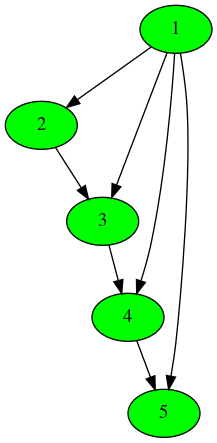

In [8]:
G = Graph()
G.load_graph("sol.txt")
G.draw()